### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing the dataframe
df=pd.read_csv("Global+Superstore+Data.csv")

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
### Concatanating Market and Segment columns
df["Market_segment"]=df.Market+"-"+df.Segment

In [6]:
### Converting Order date to Year-Month format
df["Order Date"]=pd.to_datetime(df["Order Date"]).dt.to_period("M")

In [7]:
### Droping the old Market and Segment Columns
df.drop(["Market","Segment"],axis=1,inplace=True)

In [8]:
df

,Order Date,Sales,Profit,Market_segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-05,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-05,2832.960,311.5200,Africa-Consumer
...,...,...,...,...
51285,2014-06,65.100,4.5000,APAC-Corporate
51286,2014-06,0.444,-1.1100,US-Consumer
51287,2013-02,22.920,11.2308,US-Home Office
51288,2012-02,13.440,2.4000,LATAM-Home Office


In [9]:
### Aggregating profit according to each Order Month
pivot=pd.pivot_table(data=df,values="Profit",index="Order Date",columns="Market_segment",aggfunc="sum")
pivot.head()

Market_segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [10]:
##train-test split on the aggregated data
train=pivot.loc["2011-01":"2014-06"]
test=pivot.loc["2014-07":]

In [11]:
test

Market_segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-07,1415.0049,3330.4251,2642.6874,472.287,389.322,795.960,NaN,65.10,10.80,463.194,...,1530.378,4224.1095,3842.6700,-1625.1780,126.17668,1333.21772,1443.44916,1171.6925,2941.9503,1587.7943
2014-08,4405.5609,1623.9069,1059.0081,1848.834,112.041,1717.773,617.01,58.95,110.22,1485.804,...,423.114,7316.4210,8370.2250,1471.8645,5135.04420,489.52444,1142.49640,2806.9233,3284.5880,1168.9436
2014-09,4342.6419,4419.9804,7389.1881,2915.433,350.439,499.089,25.20,128.04,63.48,2444.796,...,-471.552,5405.8485,4341.1080,880.9695,4382.15812,1914.78796,1428.99836,4401.4550,5156.8145,2788.8755
2014-10,7997.8092,4371.8221,4151.0742,745.929,2501.847,-1130.139,3.30,390.51,NaN,2005.428,...,337.764,6641.0205,4256.6745,1480.4205,4068.74672,2687.02280,2149.39528,2515.7175,2505.4306,4104.2505
2014-11,13773.4995,5588.2947,3526.9944,1689.360,-381.669,2001.189,236.13,104.13,86.64,432.399,...,837.063,1635.9270,5266.0665,3157.5615,4208.42260,1813.60880,1342.24256,5981.7104,2812.3922,493.4159
2014-12,6045.4858,2256.1737,1210.5924,-123.438,385.047,685.410,208.53,1196.40,NaN,894.621,...,-243.990,8065.3410,4232.6595,3955.2420,6299.04436,2486.67296,1255.79648,4398.5922,1601.5969,2608.6367


In [12]:
### Finding COV values for all the Market Segments in the train table
COV=pd.DataFrame()
for i in train:
    l={"Market_segment":i,"COV":np.std(train[i])/np.mean(train[i])}
    COV=COV.append(l,ignore_index=True)
COV

,Market_segment,COV
0,APAC-Consumer,0.522725
1,APAC-Corporate,0.530051
2,APAC-Home Office,1.008219
3,Africa-Consumer,1.310351
4,Africa-Corporate,1.891744
5,Africa-Home Office,2.012937
6,Canada-Consumer,1.250315
7,Canada-Corporate,1.786025
8,Canada-Home Office,2.369695
9,EMEA-Consumer,2.652495


In [13]:
COV.sort_values("COV",ascending=True)
## APAC-Consumer is the most profitable segment with the least COV

,Market_segment,COV
0,APAC-Consumer,0.522725
1,APAC-Corporate,0.530051
12,EU-Consumer,0.595215
15,LATAM-Consumer,0.683770
13,EU-Corporate,0.722076
16,LATAM-Corporate,0.882177
14,EU-Home Office,0.938072
2,APAC-Home Office,1.008219
18,US-Consumer,1.010530
19,US-Corporate,1.071829


In [14]:
### Going back to the original data and dropping all the other segments

In [15]:
data=df[df["Market_segment"]=="APAC-Consumer"]

In [16]:
## Aggregating sales based on Order month
data=data.groupby("Order Date").sum()
data

,Sales,Profit
Order Date,,
2011-01,18821.9898,2254.4898
2011-02,23313.3531,4627.8531
2011-03,26518.4919,2337.8319
2011-04,12046.0923,633.6423
2011-05,25941.9000,3838.9500
2011-06,30398.9316,5231.0316
2011-07,22431.5949,1928.5449
2011-08,20331.0735,1101.5235
2011-09,24860.3949,3088.9449


In [17]:
### Splitting the data into train and test again
train_new = data.loc["2011-01":"2014-06"]
test_new=data.loc["2014-07":]

In [18]:
## Changing the date into time stamp again for future modelling
train_new.index=train_new.index.to_timestamp()
test_new.index=test_new.index.to_timestamp()

0


/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

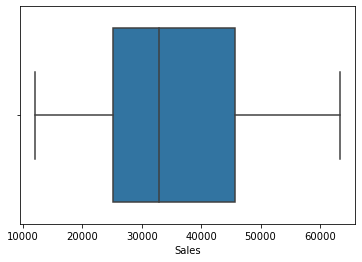

In [19]:
print(train_new.isna().sum().sum())
### There are no missing values in the dataset. Checking for outliers
sns.boxplot(train_new["Sales"])
## No values outside the whiskers. No outliers found

In [20]:
### Checking the Seasonal decomposition
from pylab import rcParams
import statsmodels.api as sm

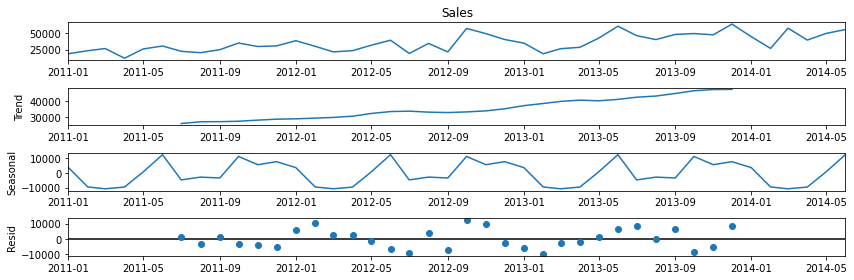

In [21]:
## Additive model
rcParams["figure.figsize"]=12,4
decompose=sm.tsa.seasonal_decompose(train_new["Sales"],model="additive")
fig=decompose.plot()


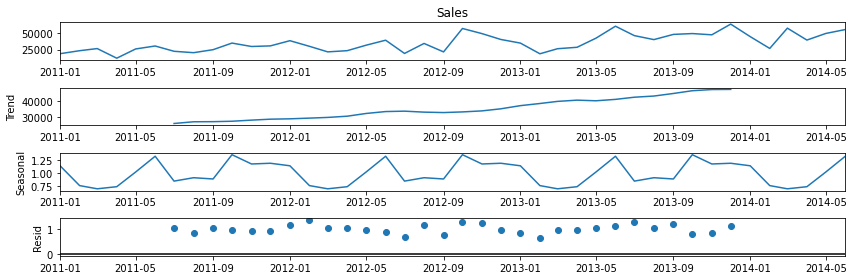

In [22]:
## Multiplicative model
rcParams["figure.figsize"]=12,4
decompose=sm.tsa.seasonal_decompose(train_new["Sales"],model="multiplicative")
fig=decompose.plot()

In [23]:
## It clearly has an upward trend and a seasonality. According to the flowchart SARIMA and Holt Winters should give us the best results

### Exponential Smoothening Methods

#### Simple Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [25]:
model=SimpleExpSmoothing(train_new["Sales"])
model_fit=model.fit(smoothing_level=0.2,optimized=False)

In [26]:
y_hat_se=test_new.copy()
y_hat_se["se"]=model_fit.forecast(6)


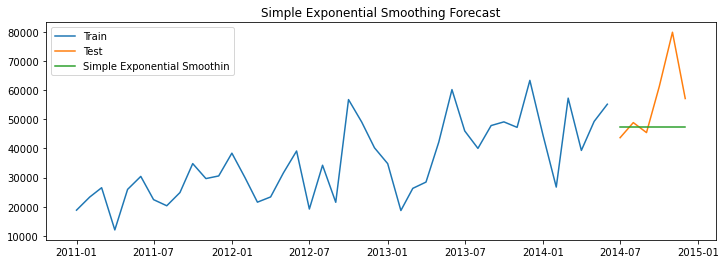

In [27]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_se["se"],label="Simple Exponential Smoothin")
plt.legend(loc="best")
plt.title("Simple Exponential Smoothing Forecast")
plt.show()

In [28]:
### Finding the MAPE of the forecast method and storing it in a dataframe
MAPE=np.round((abs(test_new["Sales"]-y_hat_se["se"])/test_new["Sales"]*100).mean(),2)
result=pd.DataFrame({"Method":["Simple Exponential Smoothing"],"MAPE":[MAPE]})

In [29]:
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99


#### Holt's Exponential Smoothing

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [31]:
## using manual values of alpha and beta values as 0.2 and 0.01 respectively
model=ExponentialSmoothing(np.asarray(train_new["Sales"]),trend="add",seasonal_periods=12,seasonal=None)
model_fit=model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)

/var/folders/06/mgzhqdl50xj7ts5rk5j6s2_80000gn/T/ipykernel_62520/2998049717.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model_fit=model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)


In [32]:
y_hat_he=test_new.copy()
y_hat_he["he"]=model_fit.forecast(6)

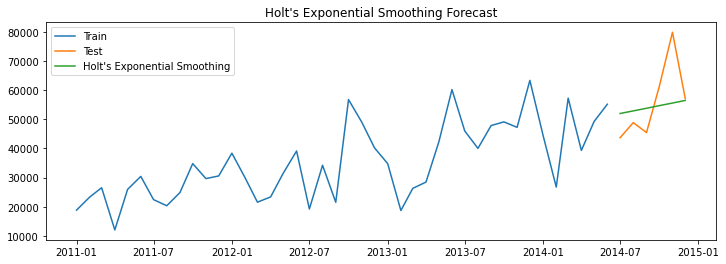

In [33]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_he["he"],label="Holt's Exponential Smoothing")
plt.legend(loc="best")
plt.title("Holt's Exponential Smoothing Forecast")
plt.show()

In [34]:
MAPE2=np.round((abs(test_new["Sales"]-y_hat_he["he"])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["Holt's Exponential Smoothing"],"MAPE":[MAPE2]})
temp_result

,Method,MAPE
0,Holt's Exponential Smoothing,14.64


In [35]:
## Adding them to the previous table
result=pd.concat([result,temp_result],axis=0,ignore_index=True)

In [36]:
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64


#### Holt Winter's Exponential Smoothing Additive

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [38]:
model=ExponentialSmoothing(np.asarray(train_new["Sales"]),trend="add",seasonal_periods=12,seasonal="add")
model_fit=model.fit(optimized=True)

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [39]:
y_hat_hwa=test_new.copy()
y_hat_hwa["hwa"]=model_fit.forecast(6)

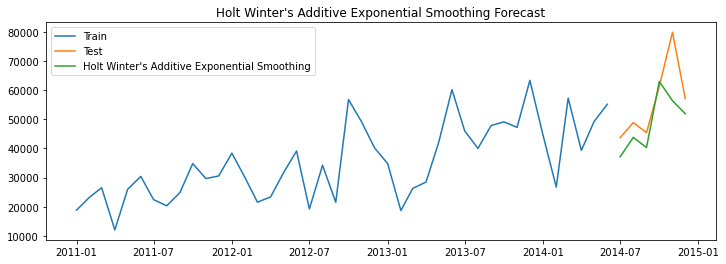

In [40]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_hwa["hwa"],label="Holt Winter's Additive Exponential Smoothing")
plt.legend(loc="best")
plt.title("Holt Winter's Additive Exponential Smoothing Forecast")
plt.show()

In [41]:
MAPE3=np.round((abs(test_new["Sales"]-y_hat_hwa["hwa"])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["Holt Winter's Additive Exponential Smoothing"],"MAPE":[MAPE3]})
temp_result

,Method,MAPE
0,Holt Winter's Additive Exponential Smoothing,13.02


In [42]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02


#### Holt Winter's Multiplicative Exponential Smoothing

In [43]:
model=ExponentialSmoothing(np.asarray(train_new["Sales"]),trend="add",seasonal_periods=12,seasonal="mul")
model_fit=model.fit(optimized=True)

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [44]:
y_hat_hwm=test_new.copy()
y_hat_hwm["hwm"]=model_fit.forecast(6)

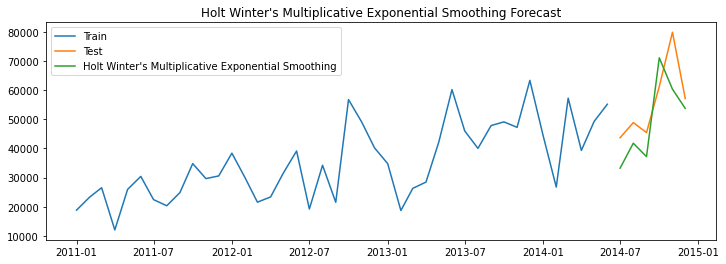

In [45]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_hwm["hwm"],label="Holt Winter's Multiplicative Exponential Smoothing")
plt.legend(loc="best")
plt.title("Holt Winter's Multiplicative Exponential Smoothing Forecast")
plt.show()

In [46]:
MAPE4=np.round((abs(test_new["Sales"]-y_hat_hwm["hwm"])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["Holt Winter's Multiplicative Exponential Smoothing"],"MAPE":[MAPE4]})
temp_result

,Method,MAPE
0,Holt Winter's Multiplicative Exponential Smoot...,17.17


In [47]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17


In [48]:
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17


### ARIMA Methods

In [49]:
## Checking stationarity of the series

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
data.index=data.index.to_timestamp()

In [52]:
adf_test=adfuller(data["Sales"])
adf_test

(-3.3760244736258023,
 0.011803859657119784,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 804.80930070885)

<AxesSubplot:xlabel='Order Date'>

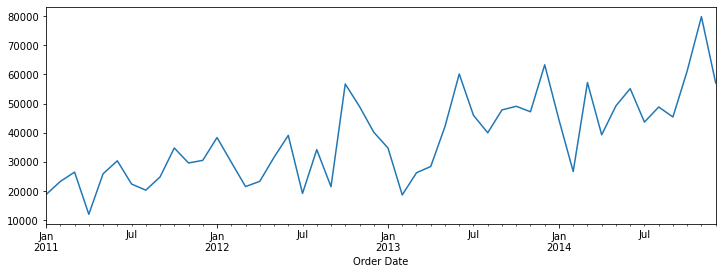

In [53]:
data["Sales"].plot()

In [54]:
from statsmodels.tsa.stattools import kpss

In [55]:
kpss(data["Sales"])

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.1037517499270595,
 0.01,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [56]:
### Visually the line looks non stationary, so using boxcox and differencing
### 1% chance of data being non stationary according to adf test

In [57]:
from scipy.stats import boxcox

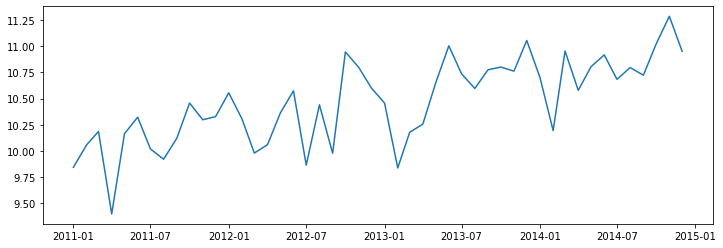

In [58]:
data_boxcox=pd.Series(boxcox(data["Sales"],lmbda=0),index=data.index)
plt.plot(data_boxcox,label="Data after transformation")
plt.show()

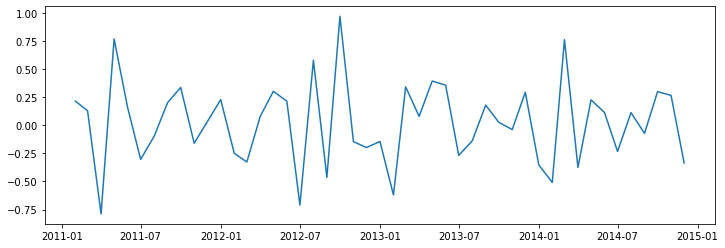

In [59]:
## Differencing
data_boxcox_diff=pd.Series(data_boxcox-data_boxcox.shift(),index=data.index)
plt.plot(data_boxcox_diff,label="Data after boxcox and Differencing")

plt.show()

In [60]:
data_boxcox_diff.dropna(inplace=True)

In [61]:
adfuller(data_boxcox_diff)

(-4.535011324054364,
 0.0001698967632114325,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 20.421044121623893)

In [62]:
###We can now say with 99% confidence that the plot is stationary

In [63]:
### New train and test datasets for data_boxcox_diff and data_boxcox
train_len=len(train_new)
train_boxcox=data_boxcox[:train_len]
test_boxcox=data_boxcox[train_len:]
train_boxcox_diff=data_boxcox_diff[:train_len-1]
test_boxcox_diff=data_boxcox_diff[train_len-1:]

#### AR Method

In [64]:
from statsmodels.tsa.arima.model import ARIMA

In [65]:
## Plotting ACF and PACF plots


In [66]:
from statsmodels.graphics.tsaplots import plot_acf


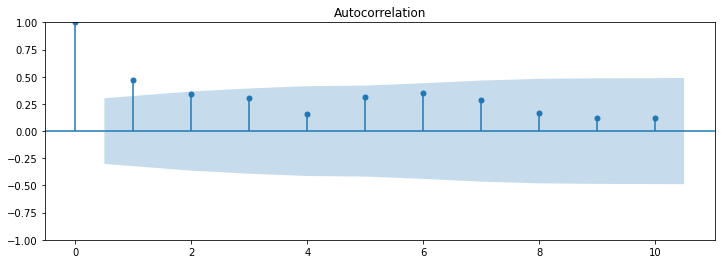

In [67]:
fig=plot_acf(train_new["Sales"],ax=plt.gca(),lags=10)
plt.show()

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


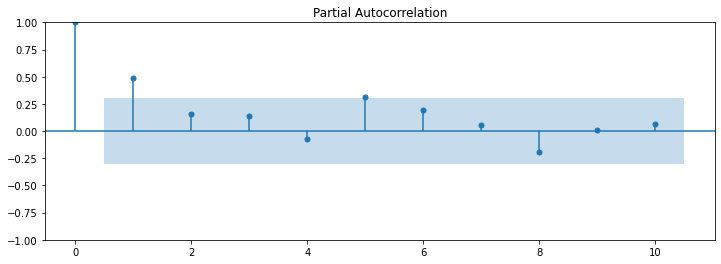

In [69]:
fig=plot_pacf(train_new["Sales"],ax=plt.gca(),lags=10)
plt.show()

In [70]:
## AS per the problem statement, using p=1,q=1,d=1

In [71]:
model=ARIMA(train_boxcox_diff,order=(1,0,0))
model_fit=model.fit()
model_fit.params

const     0.024251
ar.L1    -0.406725
sigma2    0.124377
dtype: float64

In [72]:
y_hat_ar=data_boxcox_diff.copy()
y_hat_ar["ar_boxcox_diff"]=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar["ar_boxcox"]=y_hat_ar["ar_boxcox_diff"].cumsum()
y_hat_ar["ar_boxcox"]=y_hat_ar["ar_boxcox"].add(data_boxcox[0])
y_hat_ar["ar_forecast"]=np.exp(y_hat_ar["ar_boxcox"])

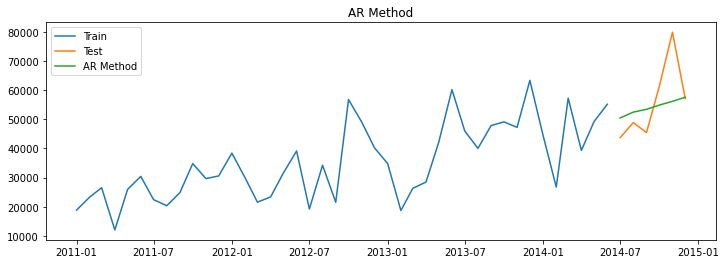

In [73]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_ar["ar_forecast"][test_new.index.min():],label="AR Method")
plt.legend(loc="best")
plt.title("AR Method")
plt.show()

In [74]:
MAPE5=np.round((abs(test_new["Sales"]-y_hat_ar["ar_forecast"][test_new.index.min():])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["AR Method"],"MAPE":[MAPE5]})
temp_result

,Method,MAPE
0,AR Method,13.55


In [75]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17
4,AR Method,13.55


#### MA Method

In [76]:
model=ARIMA(train_boxcox_diff,order=(0,0,1))
model_fit=model.fit()

In [77]:
y_hat_ma=data_boxcox_diff.copy()
y_hat_ma["ma_boxcox_diff"]=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma["ma_boxcox"]=y_hat_ma["ma_boxcox_diff"].cumsum()
y_hat_ma["ma_boxcox"]=y_hat_ma["ma_boxcox"].add(data_boxcox[0])
y_hat_ma["ma_forecast"]=np.exp(y_hat_ma["ma_boxcox"])

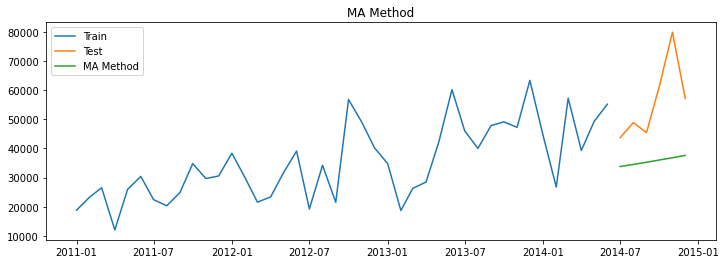

In [78]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_ma["ma_forecast"][test_new.index.min():],label="MA Method")
plt.legend(loc="best")
plt.title("MA Method")
plt.show()

In [79]:
MAPE6=np.round((abs(test_new["Sales"]-y_hat_ma["ma_forecast"][test_new.index.min():])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["MA Method"],"MAPE":[MAPE6]})
temp_result

,Method,MAPE
0,MA Method,33.95


In [80]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17
4,AR Method,13.55
5,MA Method,33.95


#### ARMA method

In [81]:
model4=ARIMA(train_boxcox_diff,order=(1,0,1))
model4_fit=model4.fit()
model4_fit.params

const     0.021465
ar.L1     0.074610
ma.L1    -0.999936
sigma2    0.079225
dtype: float64

In [82]:
y_hat_arma=data_boxcox_diff.copy()
y_hat_arma["arma_boxcox_diff"]=model4_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma["arma_boxcox"]=y_hat_arma["arma_boxcox_diff"].cumsum()
y_hat_arma["arma_boxcox"]=y_hat_arma["arma_boxcox"].add(data_boxcox[0])
y_hat_arma["arma_forecast"]=np.exp(y_hat_arma["arma_boxcox"])

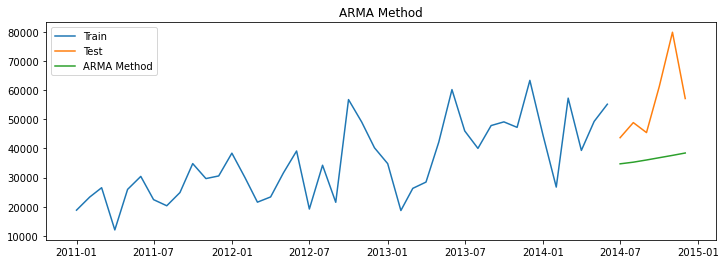

In [83]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_arma["arma_forecast"][test_new.index.min():],label="ARMA Method")
plt.legend(loc="best")
plt.title("ARMA Method")
plt.show()

In [84]:
MAPE7=np.round((abs(test_new["Sales"]-y_hat_arma["arma_forecast"][test_new.index.min():])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["ARMA Method"],"MAPE":[MAPE7]})
temp_result

,Method,MAPE
0,ARMA Method,32.41


In [85]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17
4,AR Method,13.55
5,MA Method,33.95
6,ARMA Method,32.41


### ARIMA Method

In [86]:
model=ARIMA(train_boxcox,order=(1,1,1))
model_fit=model.fit()
model_fit.params

ar.L1     0.113931
ma.L1    -0.793406
sigma2    0.101984
dtype: float64

In [87]:
y_hat_arima=data_boxcox_diff.copy()
y_hat_arima["arima_boxcox"]=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima["arima_forecast"]=np.exp(y_hat_arima["arima_boxcox"])

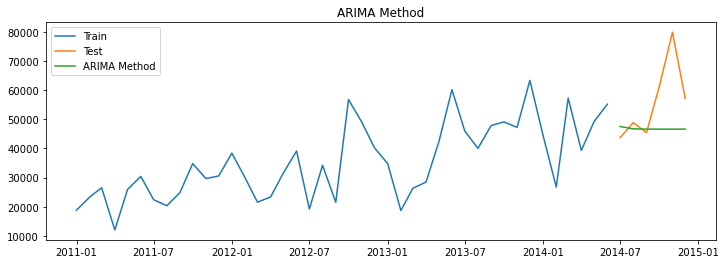

In [88]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_arima["arima_forecast"][test_new.index.min():],label="ARIMA Method")
plt.legend(loc="best")
plt.title("ARIMA Method")
plt.show()

In [89]:
MAPE8=np.round((abs(test_new["Sales"]-y_hat_arima["arima_forecast"][test_new.index.min():])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["ARIMA Method"],"MAPE":[MAPE8]})
temp_result

,Method,MAPE
0,ARIMA Method,16.61


In [90]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17
4,AR Method,13.55
5,MA Method,33.95
6,ARMA Method,32.41
7,ARIMA Method,16.61


#### SARIMA Method

In [91]:
### Importing the libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Taking p=1,d=1,q=1 according to the Problem statement. We still have to find the other seasonal order parameters

In [92]:
import itertools

In [93]:
p=q=d=range(3)
### WE will limit possible values of seasonal_order parameters within a combination of 0,1,2. Freq here is 12

seasonal=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,q,d))]

In [94]:
dictionary={}
for i in seasonal:
    try:
        model=SARIMAX(train_boxcox,order=(1,1,1),seasonal_order=i)
        model_fit=model.fit()
        dictionary.update({i:[model_fit.aic]})
    except:
        continue
        

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07395D-01    |proj g|=  1.08727D-01

At iterate    5    f=  2.92601D-01    |proj g|=  8.28533D-02

At iterate   10    f=  2.80596D-01    |proj g|=  4.63946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.074D-05   2.806D-01
  F =  0.28059572209938993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  2.16476D-01    |proj g|=  1.59795D-02

At iterate   15    f=  2.15693D-01    |proj g|=  1.02733D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.596D-05   2.157D-01
  F =  0.21566657702305891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34913D-01    |proj g|=  1.42437D-01

At iterate    5    f=  2.64407D-01    |proj g|=  3.97189D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.57056D-01    |proj g|=  2.96223D-03

At iterate   25    f=  2.57020D-01    |proj g|=  1.59609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   3.429D-04   2.570D-01
  F =  0.25702010223343907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34913D-01    |proj g|=  1.78819D-01

At iterate    5    f=  2.61956D-01    |proj g|=  1.08100D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34913D-01    |proj g|=  1.78819D-01

At iterate    5    f=  2.71492D-01    |proj g|=  5.39403D-02

At iterate   10    f=  2.05205D-01    |proj g|=  9.75323D-02

At iterate   15    f=  1.91828D-01    |proj g|=  1.51388D-02

At iterate   20    f=  1.90391D-01    |proj g|=  1.39873D-02

At iterate   25    f=  1.90234D-01    |proj g|=  2.09006D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  1.90223D-01    |proj g|=  8.32049D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     61      2     0     0   1.122D-04   1.902D-01
  F =  0.19022316355809119     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00002D-01    |proj g|=  2.22280D-02

At iterate    5    f=  3.99737D-01    |proj g|=  4.21386D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  3.99587D-01    |proj g|=  6.98930D-03

At iterate   10    f=  3.98449D-01    |proj g|=  3.28781D-02

At iterate   15    f=  3.86236D-01    |proj g|=  7.52737D-02

At iterate   20    f=  3.76379D-01    |proj g|=  1.32485D-02

At iterate   25    f=  3.75505D-01    |proj g|=  1.01147D-02

At iterate   30    f=  3.75360D-01    |proj g|=  6.11803D-03

At iterate   35    f=  3.75347D-01    |proj g|=  3.94679D-03

At iterate   40    f=  3.75344D-01    |proj g|=  1.21266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     71      1     0     0   1.213D-04   3.753D-01
  F =  0.375343762297

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.25789D-01    |proj g|=  2.54210D-01

At iterate   10    f=  2.14462D-01    |proj g|=  7.48657D-02

At iterate   15    f=  2.07193D-01    |proj g|=  2.56652D-02

At iterate   20    f=  2.07140D-01    |proj g|=  1.49040D-03

At iterate   25    f=  2.07139D-01    |proj g|=  7.55860D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   5.919D-05   2.071D-01
  F =  0.20713876826161456     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  2.27874D-01    |proj g|=  1.50032D-01

At iterate   10    f=  2.14127D-01    |proj g|=  1.19587D-02

At iterate   15    f=  2.13228D-01    |proj g|=  2.59996D-02

At iterate   20    f=  2.11859D-01    |proj g|=  4.25758D-02

At iterate   25    f=  2.07840D-01    |proj g|=  1.35620D-01

At iterate   30    f=  2.06201D-01    |proj g|=  2.60279D-02

At iterate   35    f=  2.05345D-01    |proj g|=  2.58980D-02

At iterate   40    f=  2.05012D-01    |proj g|=  7.68723D-03

At iterate   45    f=  2.04898D-01    |proj g|=  3.43145D-03

At iterate   50    f=  2.04853D-01    |proj g|=  1.28510D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  2.03389D-01    |proj g|=  4.14097D-02

At iterate   15    f=  2.01777D-01    |proj g|=  1.98979D-02

At iterate   20    f=  2.01431D-01    |proj g|=  6.50208D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     41      1     0     0   1.136D-03   2.014D-01
  F =  0.20138454909835635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34913D-01    |proj g|=  1.78819D-01


 This problem is unconstrained.



At iterate    5    f=  2.69031D-01    |proj g|=  7.27611D-02

At iterate   10    f=  2.01279D-01    |proj g|=  7.01077D-02

At iterate   15    f=  1.91472D-01    |proj g|=  1.02376D-02

At iterate   20    f=  1.90489D-01    |proj g|=  2.12881D-02

At iterate   25    f=  1.90390D-01    |proj g|=  1.34952D-02

At iterate   30    f=  1.90370D-01    |proj g|=  6.36236D-03

At iterate   35    f=  1.90363D-01    |proj g|=  4.93617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     57      1     0     0   4.938D-03   1.904D-01
  F =  0.19035999025827702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  2.10764D-01    |proj g|=  1.39766D-01

At iterate   15    f=  1.91191D-01    |proj g|=  4.37873D-02

At iterate   20    f=  1.89498D-01    |proj g|=  6.06123D-04

At iterate   25    f=  1.89447D-01    |proj g|=  9.05691D-04

At iterate   30    f=  1.89321D-01    |proj g|=  9.44643D-03

At iterate   35    f=  1.89222D-01    |proj g|=  5.06635D-03

At iterate   40    f=  1.89211D-01    |proj g|=  6.60867D-03

At iterate   45    f=  1.89196D-01    |proj g|=  2.67107D-03


/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f=  1.89196D-01    |proj g|=  1.72988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     76      1     0     0   1.730D-05   1.892D-01
  F =  0.18919616599813419     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99984D-01    |proj g|=  2.23160D-02

At iterate    5    f=  3.99512D-01    |proj g|=  6.68248D-03

At iterate   10    f=  3.98237D-01    |proj g|=  3.49858D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.99461D-01    |proj g|=  5.55934D-03

At iterate   10    f=  3.97926D-01    |proj g|=  4.83269D-02

At iterate   15    f=  3.79598D-01    |proj g|=  3.48452D-02

At iterate   20    f=  3.75708D-01    |proj g|=  8.01708D-03

At iterate   25    f=  3.75372D-01    |proj g|=  7.66097D-04

At iterate   30    f=  3.75359D-01    |proj g|=  4.39039D-04

At iterate   35    f=  3.75358D-01    |proj g|=  1.27038D-03

At iterate   40    f=  3.75354D-01    |proj g|=  2.70857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     63      1     0     0   5.870D-04   3.754D-01
  F =  0.375352794437

 This problem is unconstrained.



At iterate   10    f=  3.97759D-01    |proj g|=  5.18899D-02

At iterate   15    f=  3.77456D-01    |proj g|=  4.92728D-02

At iterate   20    f=  3.75635D-01    |proj g|=  1.47496D-02

At iterate   25    f=  3.75362D-01    |proj g|=  7.03040D-03

At iterate   30    f=  3.75351D-01    |proj g|=  3.02397D-04

At iterate   35    f=  3.75349D-01    |proj g|=  4.03453D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  3.75343D-01    |proj g|=  5.20789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     81      2     0     0   7.543D-06   3.753D-01
  F =  0.37534327009408303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55309D-01    |proj g|=  3.62125D-01

At iterate    5    f=  2.25001D-01    |proj g|=  6.00642D-02


 This problem is unconstrained.



At iterate   10    f=  2.10022D-01    |proj g|=  5.68052D-02

At iterate   15    f=  2.09809D-01    |proj g|=  7.55558D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   2.187D-06   2.098D-01
  F =  0.20980928650493685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07395D-01    |proj g|=  3.04765D-01

At iterate    5    f=  2.27047D-01    |proj g|=  1.58787D-01


/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.



At iterate   10    f=  2.10885D-01    |proj g|=  1.63148D-02

At iterate   15    f=  2.10699D-01    |proj g|=  1.11219D-02

At iterate   20    f=  2.10025D-01    |proj g|=  1.72228D-02

At iterate   25    f=  2.07350D-01    |proj g|=  3.02821D-02

At iterate   30    f=  2.06118D-01    |proj g|=  2.26002D-02

At iterate   35    f=  2.05760D-01    |proj g|=  2.82030D-03

At iterate   40    f=  2.05586D-01    |proj g|=  1.22404D-02

At iterate   45    f=  2.05511D-01    |proj g|=  9.28549D-03

At iterate   50    f=  2.05480D-01    |proj g|=  3.69474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58   

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  2.27257D-01    |proj g|=  1.57717D-01

At iterate   10    f=  2.10075D-01    |proj g|=  2.35898D-02

At iterate   15    f=  2.07647D-01    |proj g|=  5.93818D-02

At iterate   20    f=  2.03603D-01    |proj g|=  1.42982D-02

At iterate   25    f=  2.02868D-01    |proj g|=  1.32012D-02

At iterate   30    f=  2.02719D-01    |proj g|=  5.22093D-03

At iterate   35    f=  2.02643D-01    |proj g|=  7.89611D-03

At iterate   40    f=  2.02597D-01    |proj g|=  5.23537D-03

At iterate   45    f=  2.02570D-01    |proj g|=  2.43657D-03

At iterate   50    f=  2.02559D-01    |proj g|=  4.41447D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/chinmayerande/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f=  2.52909D-01    |proj g|=  3.61110D-01

At iterate   10    f=  1.98669D-01    |proj g|=  9.79464D-02

At iterate   15    f=  1.89699D-01    |proj g|=  5.90449D-03

At iterate   20    f=  1.89336D-01    |proj g|=  7.76859D-03

At iterate   25    f=  1.89024D-01    |proj g|=  1.92096D-03

At iterate   30    f=  1.89009D-01    |proj g|=  4.21817D-03

At iterate   35    f=  1.88989D-01    |proj g|=  2.45791D-03

At iterate   40    f=  1.88988D-01    |proj g|=  4.74891D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     54      1     0     0   1.077D-05   1.890D-01
  F =  0.188988195689

 This problem is unconstrained.



At iterate    5    f=  2.63647D-01    |proj g|=  7.17854D-02

At iterate   10    f=  1.98771D-01    |proj g|=  4.29338D-02

At iterate   15    f=  1.90030D-01    |proj g|=  7.67390D-03

At iterate   20    f=  1.89335D-01    |proj g|=  4.12760D-02

At iterate   25    f=  1.89054D-01    |proj g|=  1.72308D-03

At iterate   30    f=  1.89011D-01    |proj g|=  2.60737D-03

At iterate   35    f=  1.88999D-01    |proj g|=  8.72295D-04

At iterate   40    f=  1.88997D-01    |proj g|=  2.03952D-03

At iterate   45    f=  1.88997D-01    |proj g|=  9.34595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     64   

 This problem is unconstrained.



At iterate   15    f=  1.90758D-01    |proj g|=  5.13686D-02

At iterate   20    f=  1.89283D-01    |proj g|=  2.11210D-02

At iterate   25    f=  1.89119D-01    |proj g|=  1.77983D-02

At iterate   30    f=  1.89015D-01    |proj g|=  5.65002D-03

At iterate   35    f=  1.88991D-01    |proj g|=  2.05754D-03

At iterate   40    f=  1.88988D-01    |proj g|=  1.47474D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  1.88988D-01    |proj g|=  1.78949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     83      2     0     0   2.631D-05   1.890D-01
  F =  0.18898837029518883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00002D-01    |proj g|=  2.22280D-02


 This problem is unconstrained.



At iterate    5    f=  3.99512D-01    |proj g|=  6.89033D-03

At iterate   10    f=  3.98515D-01    |proj g|=  3.53011D-02

At iterate   15    f=  3.81488D-01    |proj g|=  8.65890D-02

At iterate   20    f=  3.75861D-01    |proj g|=  1.27777D-02

At iterate   25    f=  3.75383D-01    |proj g|=  5.09292D-04

At iterate   30    f=  3.75349D-01    |proj g|=  1.39694D-04

At iterate   35    f=  3.75348D-01    |proj g|=  6.18427D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     54      1     0     0   6.184D-04   3.753D-01
  F =  0.37534750544118423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.99463D-01    |proj g|=  5.55195D-03

At iterate   10    f=  3.97925D-01    |proj g|=  5.08078D-02

At iterate   15    f=  3.78116D-01    |proj g|=  1.03147D-02

At iterate   20    f=  3.75583D-01    |proj g|=  2.33969D-03

At iterate   25    f=  3.75360D-01    |proj g|=  1.78907D-03

At iterate   30    f=  3.75346D-01    |proj g|=  3.47009D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     50      1     0     0   6.171D-06   3.753D-01
  F =  0.37534606978095508     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  3.99461D-01    |proj g|=  5.56712D-03

At iterate   10    f=  3.97944D-01    |proj g|=  4.73948D-02

At iterate   15    f=  3.78302D-01    |proj g|=  6.89586D-03

At iterate   20    f=  3.75552D-01    |proj g|=  3.50313D-03

At iterate   25    f=  3.75368D-01    |proj g|=  1.20904D-03

At iterate   30    f=  3.75349D-01    |proj g|=  1.51463D-05

At iterate   35    f=  3.75348D-01    |proj g|=  4.77307D-05

At iterate   40    f=  3.75348D-01    |proj g|=  2.71486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     80      2     0     0   2.715D-05   3.753D-01
  F =  0.375347861706


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [95]:
sorted_dictionary=sorted(dictionary.items(),key=lambda x:x[1])

In [96]:
sorted_dictionary
### 0,1,1,12 has the least AIC, so is a better model for us to use

[((0, 1, 1, 12), [24.10231667610727]),
 ((1, 1, 0, 12), [24.916302124261932]),
 ((1, 0, 0, 12), [25.836574094850757]),
 ((2, 1, 0, 12), [25.87500843792803]),
 ((0, 1, 2, 12), [25.97874573887966]),
 ((1, 1, 1, 12), [25.99023918169527]),
 ((0, 0, 1, 12), [26.313850118137047]),
 ((1, 0, 1, 12), [27.399656533975623]),
 ((0, 1, 0, 12), [27.589688587608883]),
 ((2, 0, 0, 12), [27.623980066414696]),
 ((2, 1, 1, 12), [27.87576659441994]),
 ((1, 1, 2, 12), [27.89247794384327]),
 ((0, 0, 2, 12), [28.11599246993695]),
 ((1, 0, 2, 12), [29.207623331545022]),
 ((2, 0, 1, 12), [29.26034389716061]),
 ((0, 0, 0, 12), [29.570040656348755]),
 ((2, 1, 2, 12), [29.875023104795865]),
 ((2, 0, 2, 12), [31.014997248553847]),
 ((1, 2, 0, 12), [39.52924606396856]),
 ((0, 2, 1, 12), [39.56648949532823]),
 ((0, 2, 0, 12), [39.57280640360268]),
 ((0, 2, 2, 12), [41.52887603296016]),
 ((2, 2, 0, 12), [41.52919045705947]),
 ((1, 2, 1, 12), [41.52963473275308]),
 ((1, 2, 2, 12), [43.52883468790297]),
 ((2, 2, 1, 12)

In [97]:
model=SARIMAX(train_boxcox,order=(1,1,1),seasonal_order=(0,1,1,12))
model_fit=model.fit()
model_fit.params

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34913D-01    |proj g|=  1.78819D-01

At iterate    5    f=  2.61956D-01    |proj g|=  1.08100D-01

At iterate   10    f=  1.98975D-01    |proj g|=  1.82161D-01

At iterate   15    f=  1.92219D-01    |proj g|=  1.01798D-02

At iterate   20    f=  1.91736D-01    |proj g|=  3.55609D-02

At iterate   25    f=  1.91694D-01    |proj g|=  1.79368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     70      2     0     0   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ar.L1      -0.038528
ma.L1      -0.996351
ma.S.L12   -0.993608
sigma2      0.054033
dtype: float64

In [98]:
y_hat_sarima=data_boxcox.copy()
y_hat_sarima["sarima_boxcox"]=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima["sarima_forecast"]=np.exp(y_hat_sarima["sarima_boxcox"])

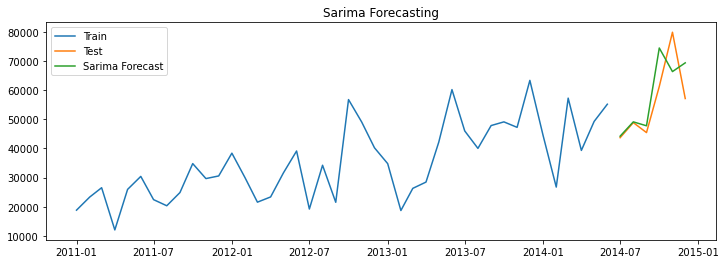

In [99]:
plt.figure(figsize=[12,4])
plt.plot(train_new["Sales"],label="Train")
plt.plot(test_new["Sales"],label="Test")
plt.plot(y_hat_sarima["sarima_forecast"][test_new.index.min():],label="Sarima Forecast")
plt.title("Sarima Forecasting")
plt.legend()
plt.show()

In [100]:
MAPE9=np.round((abs(test_new["Sales"]-y_hat_sarima["sarima_forecast"][test_new.index.min():])/test_new["Sales"]*100).mean(),2)
temp_result=pd.DataFrame({"Method":["SARIMA Method"],"MAPE":[MAPE9]})
temp_result

,Method,MAPE
0,SARIMA Method,11.12


In [101]:
result=pd.concat([result,temp_result],axis=0,ignore_index=True)

In [102]:
result

,Method,MAPE
0,Simple Exponential Smoothing,15.99
1,Holt's Exponential Smoothing,14.64
2,Holt Winter's Additive Exponential Smoothing,13.02
3,Holt Winter's Multiplicative Exponential Smoot...,17.17
4,AR Method,13.55
5,MA Method,33.95
6,ARMA Method,32.41
7,ARIMA Method,16.61
8,SARIMA Method,11.12
